# 🔋 Battery Life Prediction System

### ⚡ Intelligent Energy Forecasting

A machine learning dashboard that predicts smartphone battery life 
based on device specifications and user behavior patterns.

---

### 📊 Key Features
- 📥 User-friendly input interface  
- 🤖 Trained ML prediction model  
- 📈 Real-time battery life estimation  

---

### 🛠️ Tech Stack
Python • Pandas • Scikit-learn • Streamlit  

---

👨‍💻 Developed by group members 
📅 2026


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import joblib


In [11]:
np.random.seed(42)

n = 1000

screen_time = np.random.uniform(1, 15, n)
gaming_hours = np.random.uniform(0, 8, n)
brightness = np.random.uniform(20, 100, n)
battery_capacity = np.random.uniform(2500, 6000, n)
background_apps = np.random.randint(0, 40, n)
app_usage = np.random.randint(5, 30, n)

# Target variable (battery life formula with noise)
battery_life = (
    (battery_capacity / 500)
    - (screen_time * 0.8)
    - (gaming_hours * 1.2)
    - (brightness * 0.05)
    - (background_apps * 0.1)
    + np.random.normal(0, 1.5, n)
)

data = pd.DataFrame({
    "Screen_Time": screen_time,
    "Gaming_Hours": gaming_hours,
    "Brightness": brightness,
    "Battery_Capacity": battery_capacity,
    "Background_Apps": background_apps,
    "App_Usage": app_usage,
    "Battery_Life": battery_life
})

data.head()


,Screen_Time,Gaming_Hours,Brightness,Battery_Capacity,Background_Apps,App_Usage,Battery_Life
0,6.243562,1.481063,40.936455,4854.460480,20,25,-3.387708
1,14.310000,4.335208,39.758304,5288.384890,36,20,-11.795253
2,11.247915,6.983567,92.500366,3376.637646,26,16,-17.040873
3,9.381219,5.857799,39.963696,4687.059349,28,26,-10.485668
4,3.184261,6.452489,41.755978,4501.110941,19,12,-4.892228


In [12]:
X = data.drop("Battery_Life", axis=1)
y = data["Battery_Life"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2 Score:", r2_score(y_test, lr_pred))


Linear Regression Results
MAE: 1.1626075226504182
RMSE: 1.4774808449448118
R2 Score: 0.9296730258155826


In [14]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("\nDecision Tree Results")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("R2 Score:", r2_score(y_test, dt_pred))



Decision Tree Results
MAE: 2.3253456972413873
RMSE: 2.9685841937139688
R2 Score: 0.7160924411221393


In [15]:
models = ["Linear Regression", "Decision Tree"]
mae = [
    mean_absolute_error(y_test, lr_pred),
    mean_absolute_error(y_test, dt_pred)
]

r2 = [
    r2_score(y_test, lr_pred),
    r2_score(y_test, dt_pred)
]

comparison = pd.DataFrame({
    "Model": models,
    "MAE": mae,
    "R2 Score": r2
})

comparison


,Model,MAE,R2 Score
0,Linear Regression,1.162608,0.929673
1,Decision Tree,2.325346,0.716092


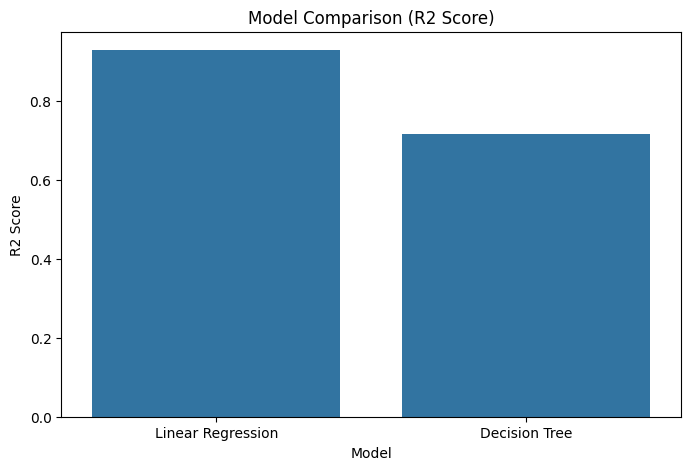

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2 Score", data=comparison)
plt.title("Model Comparison (R2 Score)")
plt.show()


In [17]:
if r2[0] > r2[1]:
    best_model = lr
    print("Best Model: Linear Regression")
else:
    best_model = dt
    print("Best Model: Decision Tree")


Best Model: Linear Regression


In [18]:
joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
